# **Chemical_Lab_Apparatus_Training_YOLOv5**

In [ ]:
!nvidia-smi

Tue Apr 29 08:17:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

***Install YOLOv5***

In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.30 MiB | 18.99 MiB/s, done.
Resolving deltas: 100% (11934/11934), done.


In [ ]:
!pip install -r requirements.txt
!pip uninstall wandb -qy
import torch
from IPython.display import Image, clear_output
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.6.0+cu124 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=2c8bf741-94c4-589e-b8bd-cce85cd23a1b, L2_cache_size=4MB)


***In this tutorial, we will use the (chemistry-lab-apparatus-detection) dataset.***

In [ ]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("")
version = project.version(8)
dataset = version.download("yolov5")

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Chemistry-Lab-Apparatus-DETN-8 in yolov5pytorch:: 100%|██████████| 9210/9210 [00:01<00:00, 7823.44it/s]


***Train Custom Model***

In [ ]:
%%time
%cd /content/yolov5/
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 50 \
  --data {dataset.location}/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      37/49      2.09G    0.02736     0.0136   0.007534         47        416:  88% 177/202 [00:28<00:03,  6.63it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      37/49      2.09G    0.02737    0.01362   0.007531         47        416:  88% 178/202 [00:29<00:03,  6.34it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      37/49      2.09G    0.02739    0.01362   0.007539         40        416:  89% 179/202 [00:29<00:03,  7.04it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [ ]:
!zip -r /content/yolov5_chemeq25.zip /content/yolov5/runs/train/yolov5s_results2
from google.colab import files
files.download('/content/yolov5_chemeq25.zip')

  adding: content/yolov5/runs/train/yolov5s_results2/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5s_results2/F1_curve.png (deflated 11%)
  adding: content/yolov5/runs/train/yolov5s_results2/results.csv (deflated 83%)
  adding: content/yolov5/runs/train/yolov5s_results2/train_batch0.jpg (deflated 4%)
  adding: content/yolov5/runs/train/yolov5s_results2/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/yolov5s_results2/val_batch1_pred.jpg (deflated 18%)
  adding: content/yolov5/runs/train/yolov5s_results2/weights/ (stored 0%)
  adding: content/yolov5/runs/train/yolov5s_results2/weights/last.pt (deflated 8%)
  adding: content/yolov5/runs/train/yolov5s_results2/weights/best.pt (deflated 8%)
  adding: content/yolov5/runs/train/yolov5s_results2/train_batch2.jpg (deflated 3%)
  adding: content/yolov5/runs/train/yolov5s_results2/PR_curve.png (deflated 20%)
  adding: content/yolov5/runs/train/yolov5s_results2/val_batch2_pred.jpg (deflated 17%)
  adding: content/yolov5/runs/t

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

***Evaluate Model Performance***

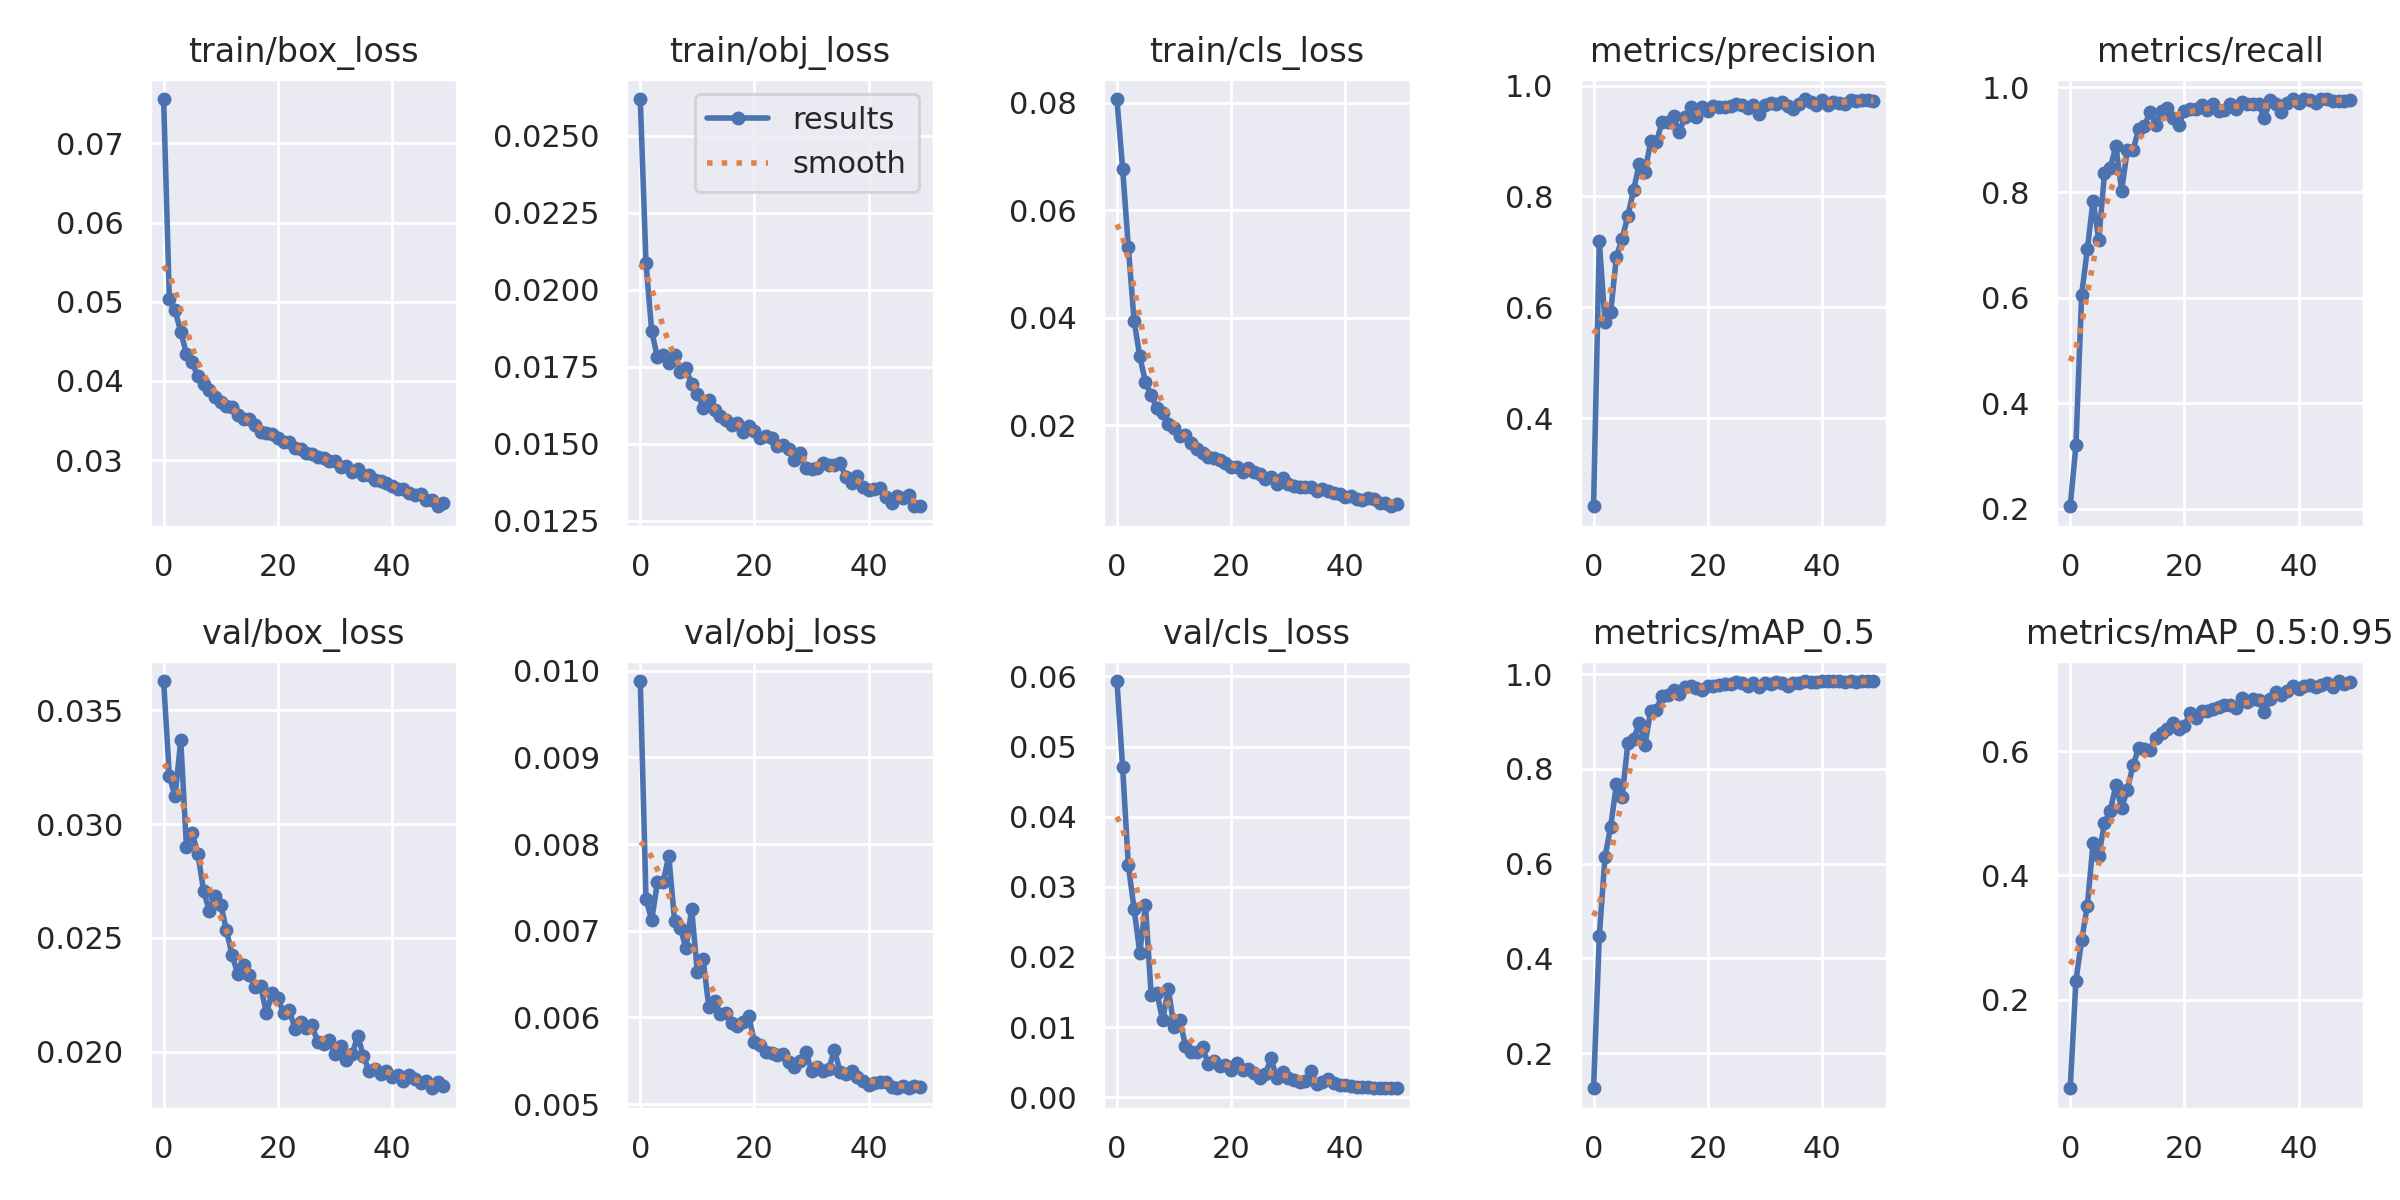

In [ ]:
from utils.plots import plot_results
Image(filename='/content/yolov5/runs/train/yolov5s_results2/results.png', width=1000)

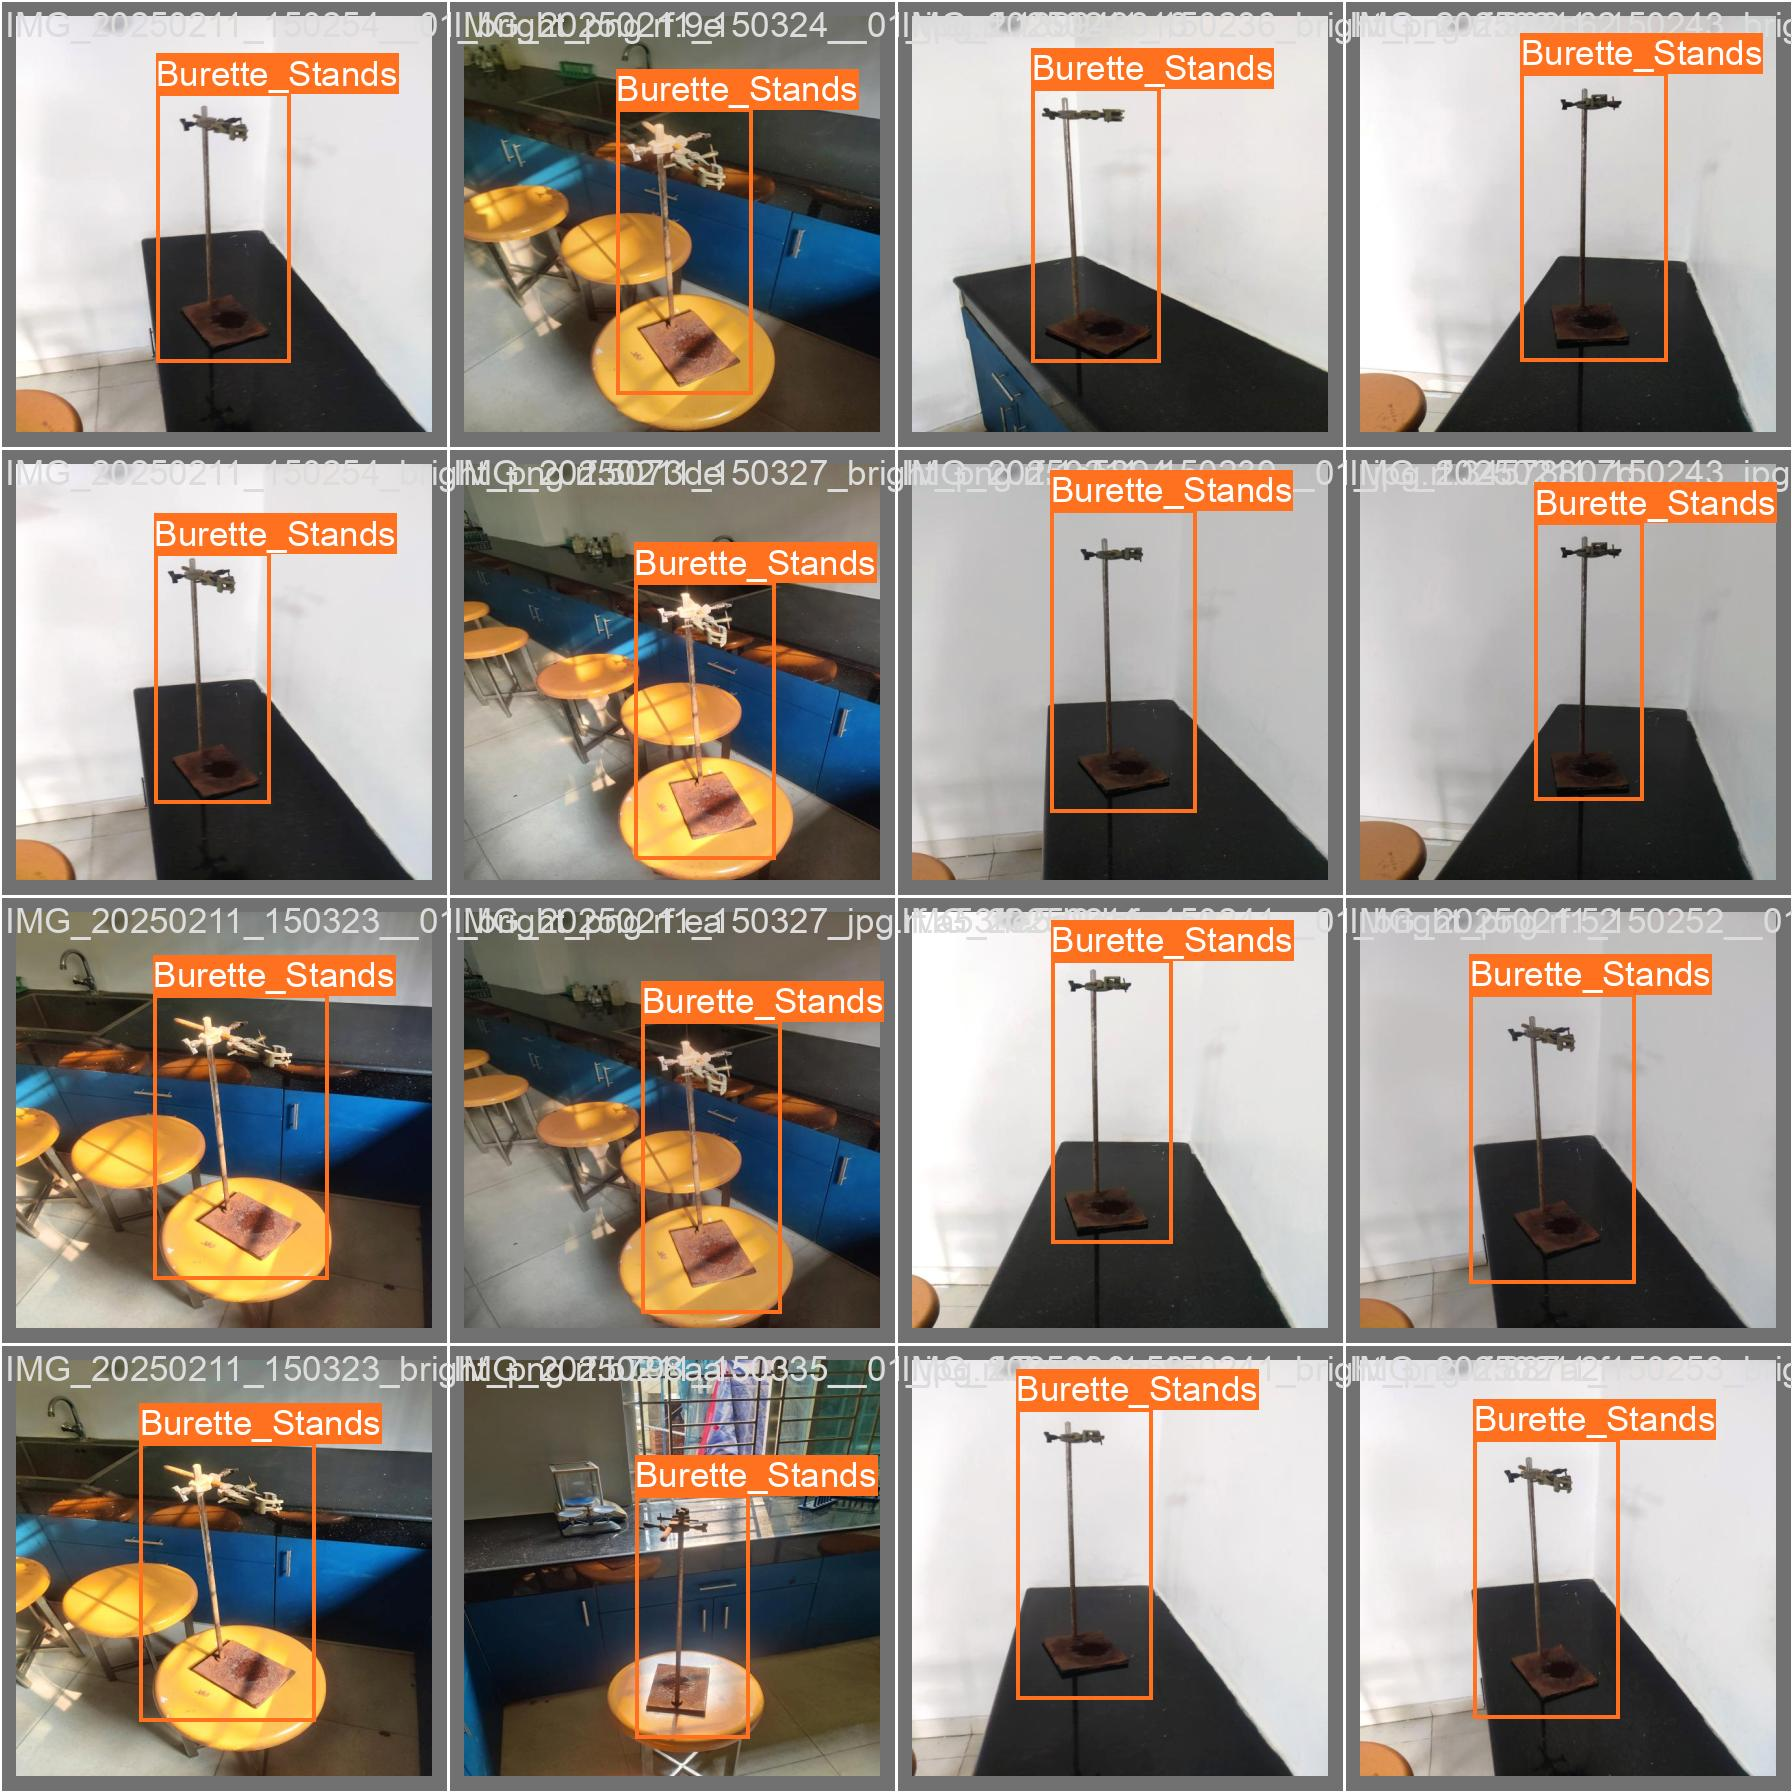

In [ ]:
Image(filename='/content/yolov5/runs/train/yolov5s_results2/val_batch0_labels.jpg', width=900)

GROUND TRUTH AUGMENTED TRAINING DATA:


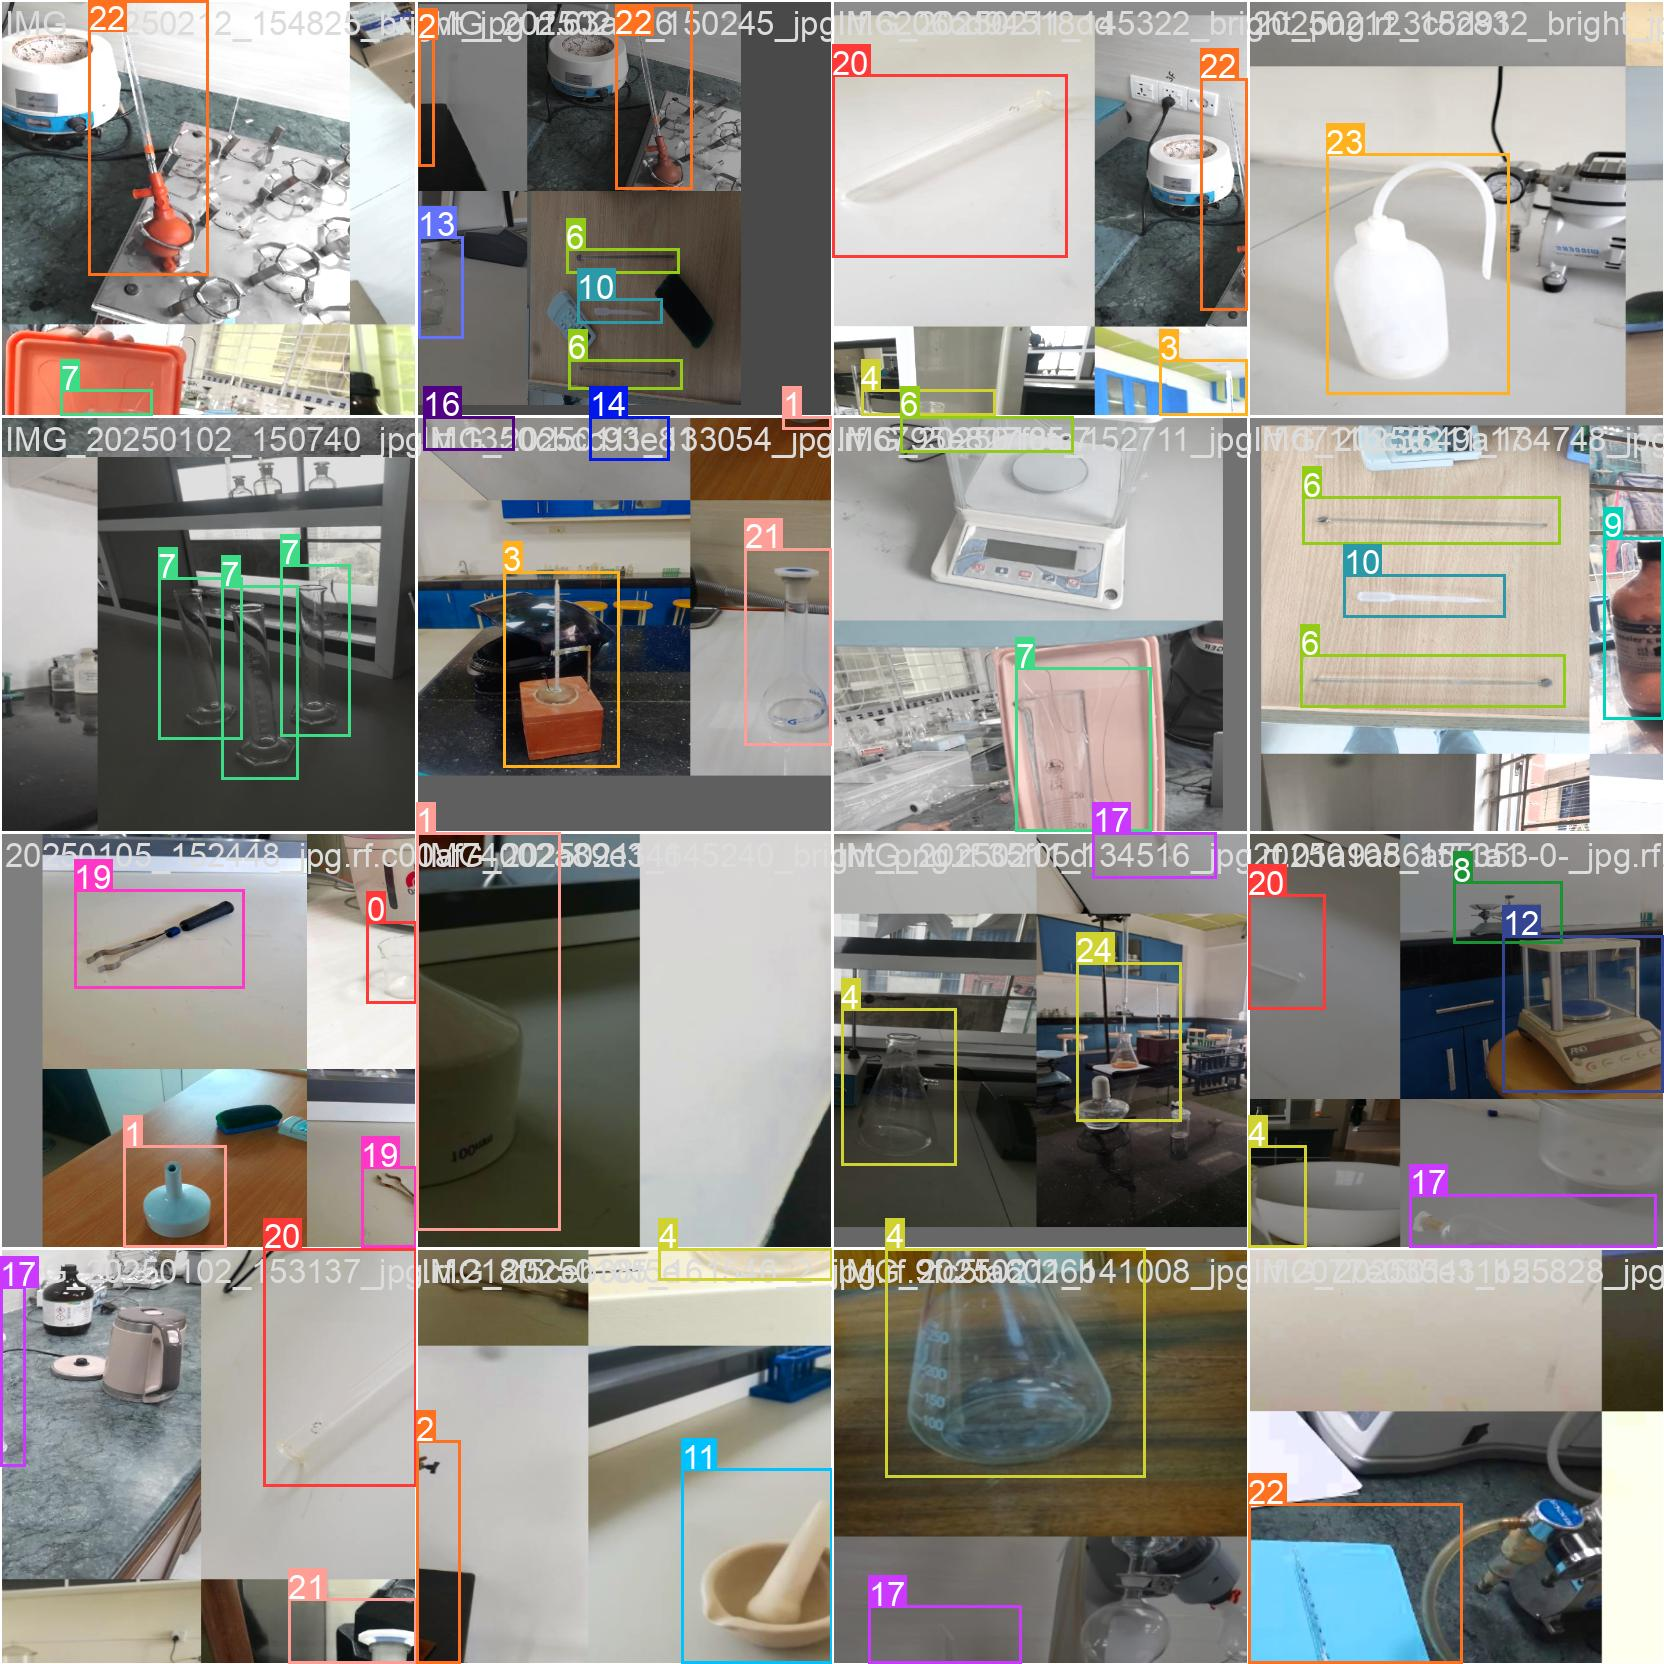

In [ ]:
print("GROUND TRUTH AUGMENTED TRAINING DATA:")
Image(filename='/content/yolov5/runs/train/yolov5s_results2/train_batch0.jpg', width=900)

***Inference With Trained Weights***

In [ ]:
%ls runs/

train/


In [ ]:
%ls runs/train/yolov5s_results2/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results2/weights/best.pt --img 416 --conf 0.35 --source {dataset.location}/test/images/

/content/yolov5
detect: weights=['runs/train/yolov5s_results2/weights/best.pt'], source=/content/yolov5/Chemistry-Lab-Apparatus-DETN-8/test/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7077550 parameters, 0 gradients, 16.0 GFLOPs
image 1/459 /content/yolov5/Chemistry-Lab-Apparatus-DETN-8/test/images/20250105_150104_jpg.rf.a190255edf3a70ffa40d81fc849c79cb.jpg: 416x416 1 Beaker, 7.2ms
image 2/459 /content/yolov5/Chemistry-Lab-Apparatus-DETN-8/test/images/20250105_151558_jp

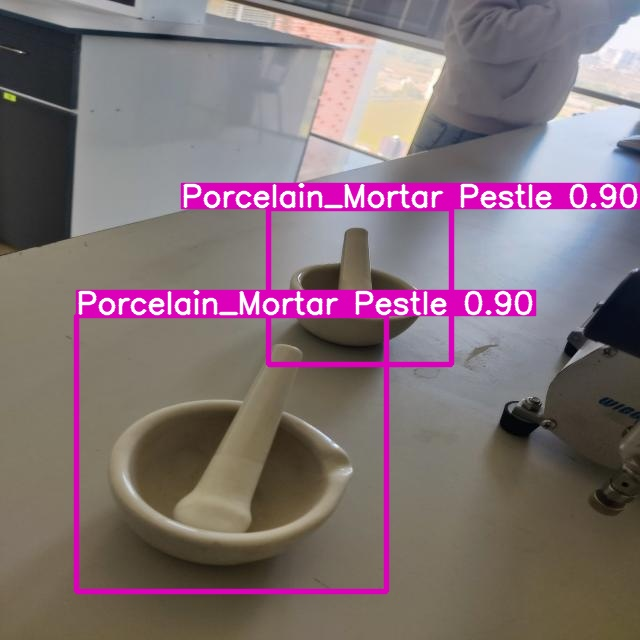

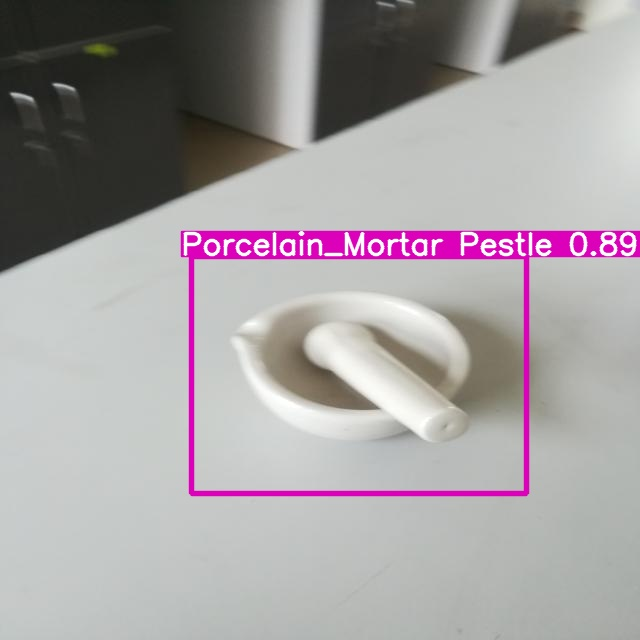

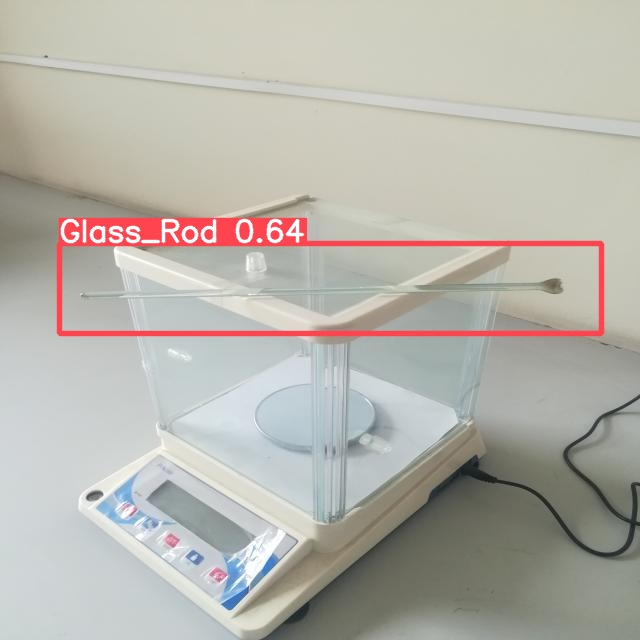

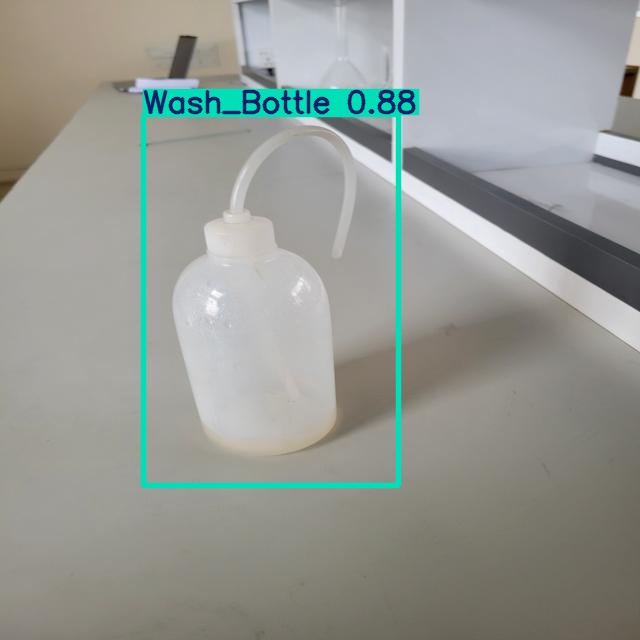

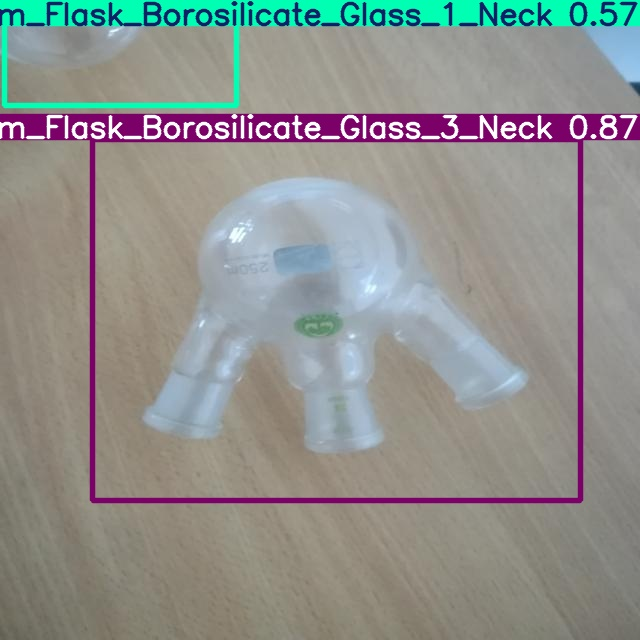

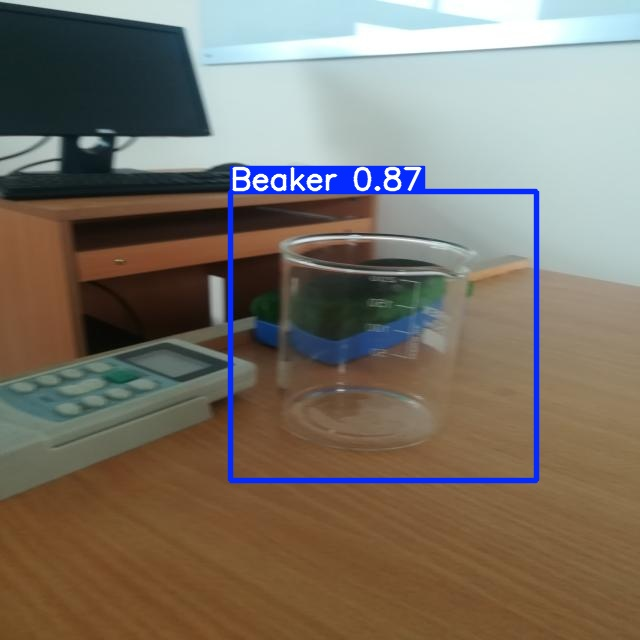

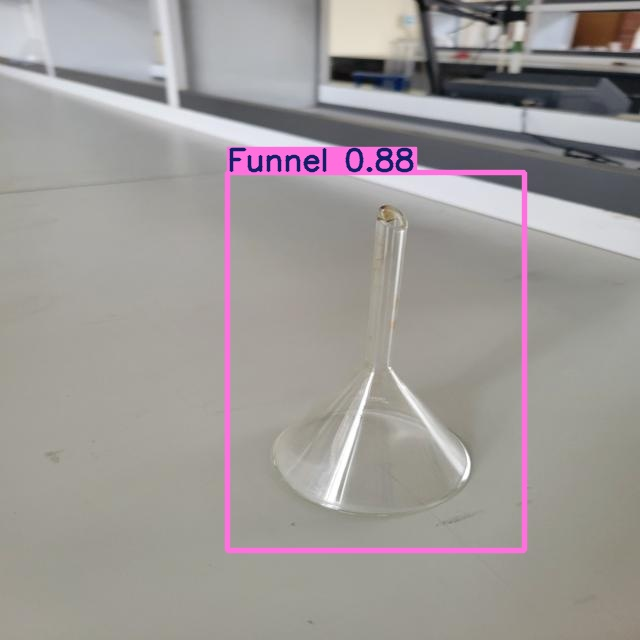

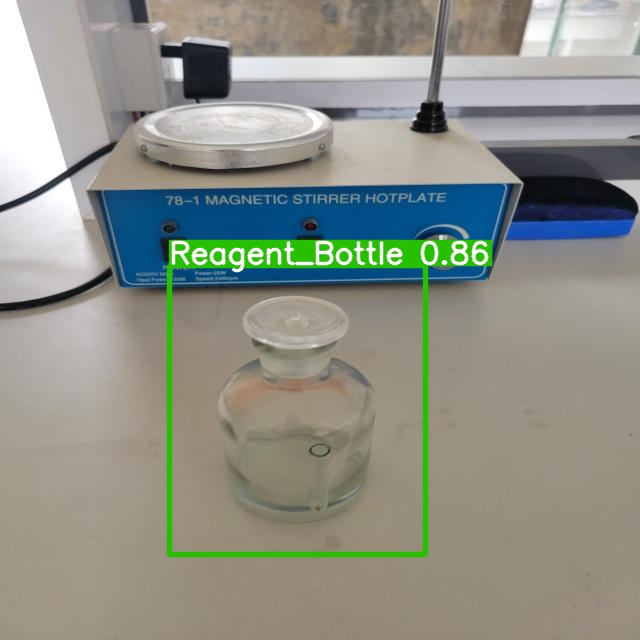

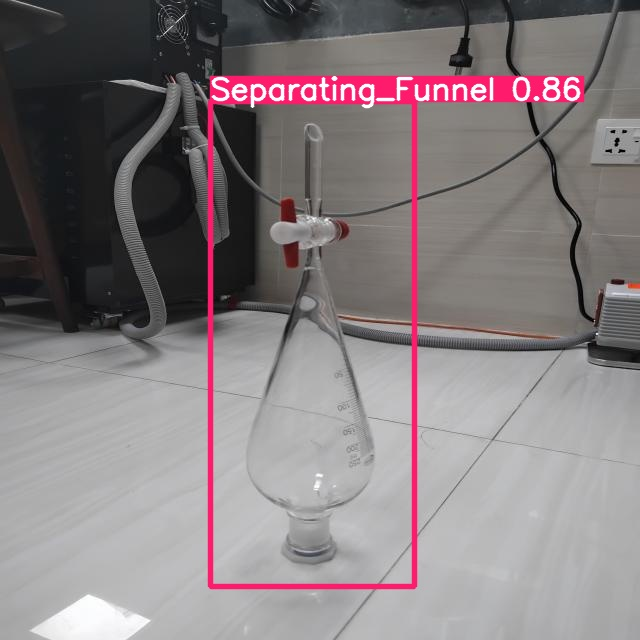

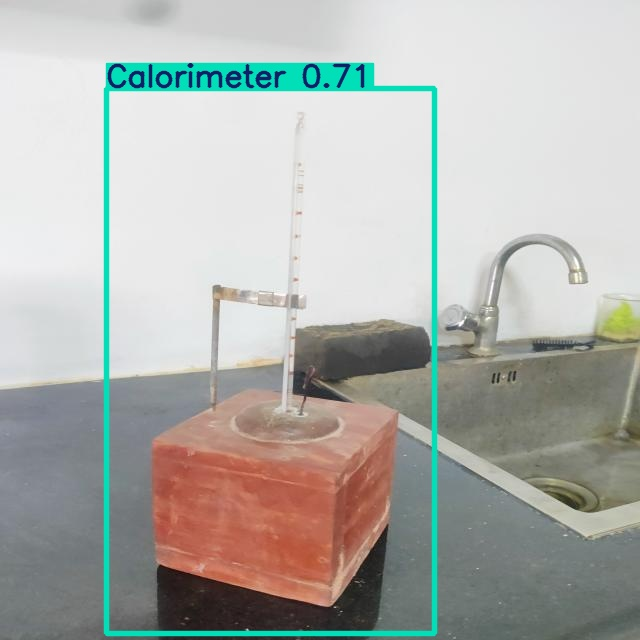

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg')[:10]:
    display(Image(filename=imageName))